In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pm10 = pd.read_csv('datasets/CleanData_PM10.csv')
pm10

,datetime,PM10
0,2020-01-01 00:00:00,42.0
1,2020-01-02 00:00:00,39.0
2,2020-01-03 00:00:00,49.0
3,2020-01-04 00:00:00,44.0
4,2020-01-05 00:00:00,27.0
...,...,...
287,2020-10-14 00:00:00,9.0
288,2020-10-15 00:00:00,14.0
289,2020-10-16 00:00:00,9.0
290,2020-10-17 00:00:00,10.0


In [3]:
pm10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  292 non-null    object 
 1   PM10      292 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.7+ KB


In [4]:
pm10['datetime'] = pd.to_datetime(pm10['datetime'])

In [5]:
pm10 = pm10.set_index(['datetime'])

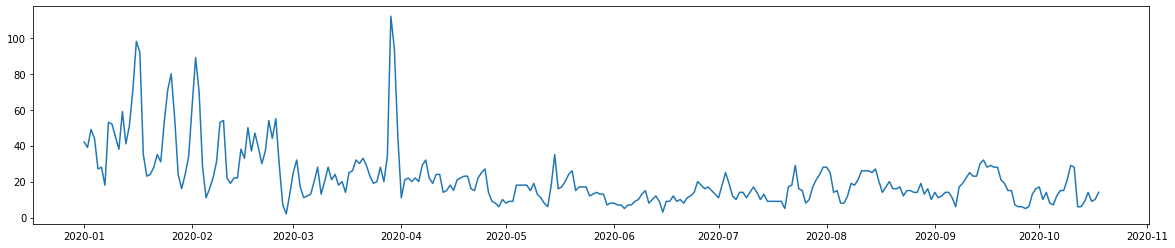

In [6]:
plt.figure(figsize = (20, 4))
plt.plot(pm10['PM10'])
plt.show()

In [7]:
no2 = pd.read_csv('C:/Users/alket/OneDrive/Desktop/Dati/DatiCSV/CleanData_NO2.csv')
no2

,datetime,NO2 (Biossido di azoto)
0,2020-01-01 00:00:00,16.0
1,2020-01-01 1:00:00,26.0
2,2020-01-01 2:00:00,25.0
3,2020-01-01 3:00:00,24.0
4,2020-01-01 4:00:00,32.0
...,...,...
6930,2020-10-15 20:00:00,43.0
6931,2020-10-15 21:00:00,37.0
6932,2020-10-15 22:00:00,38.0
6933,2020-10-15 23:00:00,33.0


In [8]:
no2['datetime'] = pd.to_datetime(no2['datetime'])

In [9]:
no2 = no2.set_index(['datetime'])

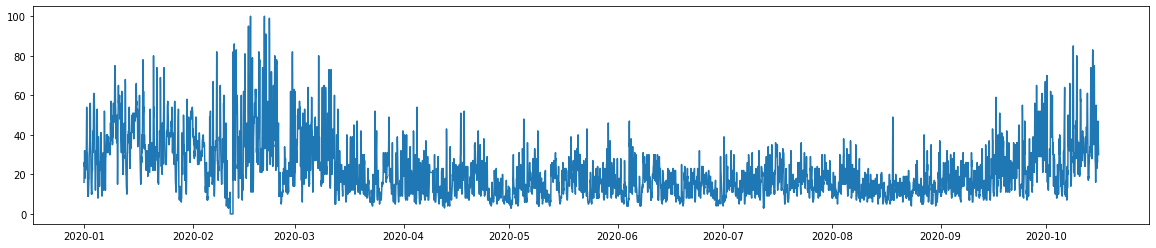

In [10]:
plt.figure(figsize = (20, 4))
plt.plot(no2['NO2 (Biossido di azoto)'])
plt.show()

In [11]:
sub_no2 = no2[:1000]


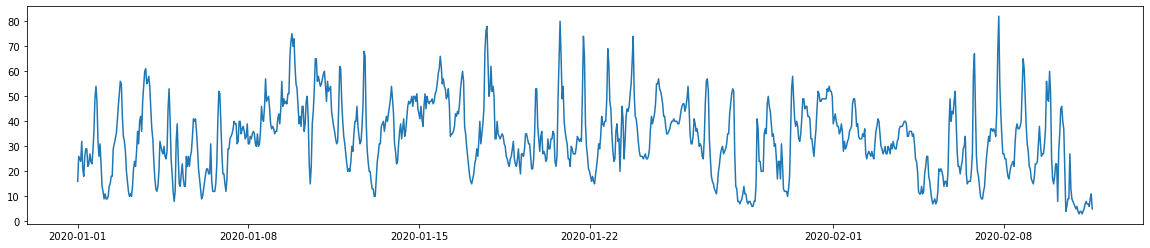

In [12]:
plt.figure(figsize = (20, 4))
plt.plot(sub_no2['NO2 (Biossido di azoto)'])
plt.show()

### Autoregression

In [13]:
no2['lag1'] = no2['NO2 (Biossido di azoto)'].shift(1)

In [14]:
no2

,NO2 (Biossido di azoto),lag1
datetime,,
2020-01-01 00:00:00,16.0,NaN
2020-01-01 01:00:00,26.0,16.0
2020-01-01 02:00:00,25.0,26.0
2020-01-01 03:00:00,24.0,25.0
2020-01-01 04:00:00,32.0,24.0
...,...,...
2020-10-15 20:00:00,43.0,47.0
2020-10-15 21:00:00,37.0,43.0
2020-10-15 22:00:00,38.0,37.0


In [15]:
no2['lag2'] = no2['NO2 (Biossido di azoto)'].shift(2)
no2

,NO2 (Biossido di azoto),lag1,lag2
datetime,,,
2020-01-01 00:00:00,16.0,NaN,NaN
2020-01-01 01:00:00,26.0,16.0,NaN
2020-01-01 02:00:00,25.0,26.0,16.0
2020-01-01 03:00:00,24.0,25.0,26.0
2020-01-01 04:00:00,32.0,24.0,25.0
...,...,...,...
2020-10-15 20:00:00,43.0,47.0,41.0
2020-10-15 21:00:00,37.0,43.0,47.0
2020-10-15 22:00:00,38.0,37.0,43.0


In [16]:
no2['lag3'] = no2['NO2 (Biossido di azoto)'].shift(3)
no2

,NO2 (Biossido di azoto),lag1,lag2,lag3
datetime,,,,
2020-01-01 00:00:00,16.0,NaN,NaN,NaN
2020-01-01 01:00:00,26.0,16.0,NaN,NaN
2020-01-01 02:00:00,25.0,26.0,16.0,NaN
2020-01-01 03:00:00,24.0,25.0,26.0,16.0
2020-01-01 04:00:00,32.0,24.0,25.0,26.0
...,...,...,...,...
2020-10-15 20:00:00,43.0,47.0,41.0,39.0
2020-10-15 21:00:00,37.0,43.0,47.0,41.0
2020-10-15 22:00:00,38.0,37.0,43.0,47.0


In [17]:
no2 = no2.bfill()
no2

,NO2 (Biossido di azoto),lag1,lag2,lag3
datetime,,,,
2020-01-01 00:00:00,16.0,16.0,16.0,16.0
2020-01-01 01:00:00,26.0,16.0,16.0,16.0
2020-01-01 02:00:00,25.0,26.0,16.0,16.0
2020-01-01 03:00:00,24.0,25.0,26.0,16.0
2020-01-01 04:00:00,32.0,24.0,25.0,26.0
...,...,...,...,...
2020-10-15 20:00:00,43.0,47.0,41.0,39.0
2020-10-15 21:00:00,37.0,43.0,47.0,41.0
2020-10-15 22:00:00,38.0,37.0,43.0,47.0


In [18]:
no2['NO2 (Biossido di azoto)'].corr(no2['lag1'])

0.9011263769179179

In [19]:
no2['NO2 (Biossido di azoto)'].corr(no2['lag2'])

0.7537023411824268

In [20]:
no2['NO2 (Biossido di azoto)'].corr(no2['lag3'])

0.6312582629008466

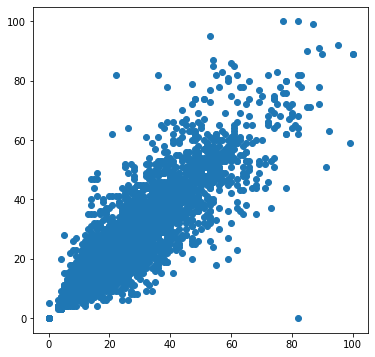

In [21]:
plt.figure(figsize = (6, 6))
plt.scatter(no2['NO2 (Biossido di azoto)'], no2['lag1'])
plt.show()

In [22]:
diff_no2 = no2['NO2 (Biossido di azoto)'].diff(2)

In [23]:
diff_no2

datetime
2020-01-01 00:00:00     NaN
2020-01-01 01:00:00     NaN
2020-01-01 02:00:00     9.0
2020-01-01 03:00:00    -2.0
2020-01-01 04:00:00     7.0
                       ... 
2020-10-15 20:00:00     2.0
2020-10-15 21:00:00   -10.0
2020-10-15 22:00:00    -5.0
2020-10-15 23:00:00    -4.0
2020-10-16 00:00:00    -8.0
Name: NO2 (Biossido di azoto), Length: 6935, dtype: float64

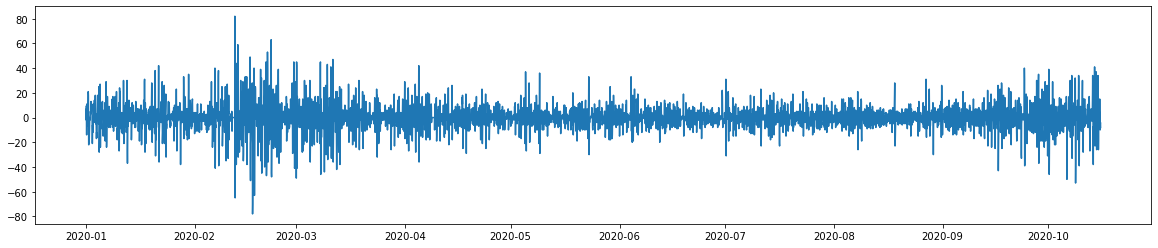

In [24]:
plt.figure(figsize = (20, 4))
plt.plot(diff_no2)
plt.show()

### Moving Average

In [25]:
no2['ma5'] = no2['NO2 (Biossido di azoto)'].rolling(5).mean()
no2

,NO2 (Biossido di azoto),lag1,lag2,lag3,ma5
datetime,,,,,
2020-01-01 00:00:00,16.0,16.0,16.0,16.0,NaN
2020-01-01 01:00:00,26.0,16.0,16.0,16.0,NaN
2020-01-01 02:00:00,25.0,26.0,16.0,16.0,NaN
2020-01-01 03:00:00,24.0,25.0,26.0,16.0,NaN
2020-01-01 04:00:00,32.0,24.0,25.0,26.0,24.6
...,...,...,...,...,...
2020-10-15 20:00:00,43.0,47.0,41.0,39.0,39.2
2020-10-15 21:00:00,37.0,43.0,47.0,41.0,41.4
2020-10-15 22:00:00,38.0,37.0,43.0,47.0,41.2


In [27]:
no2 = no2.bfill()
no2

,NO2 (Biossido di azoto),lag1,lag2,lag3,ma5
datetime,,,,,
2020-01-01 00:00:00,16.0,16.0,16.0,16.0,24.6
2020-01-01 01:00:00,26.0,16.0,16.0,16.0,24.6
2020-01-01 02:00:00,25.0,26.0,16.0,16.0,24.6
2020-01-01 03:00:00,24.0,25.0,26.0,16.0,24.6
2020-01-01 04:00:00,32.0,24.0,25.0,26.0,24.6
...,...,...,...,...,...
2020-10-15 20:00:00,43.0,47.0,41.0,39.0,39.2
2020-10-15 21:00:00,37.0,43.0,47.0,41.0,41.4
2020-10-15 22:00:00,38.0,37.0,43.0,47.0,41.2


### Using Moving Average as a simple tool for doing forecast.

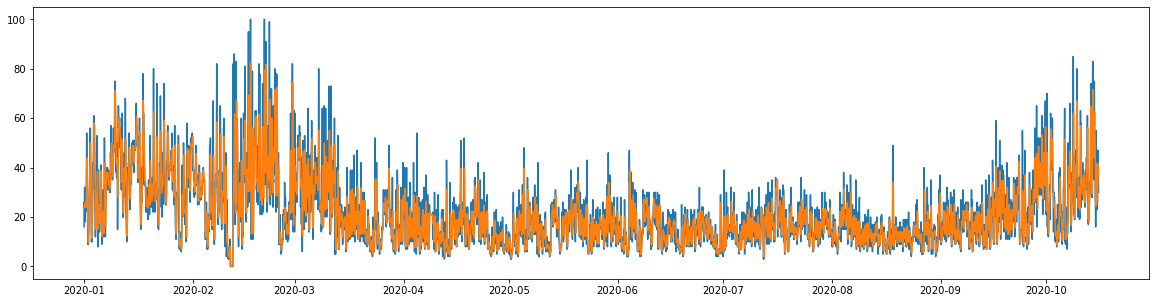

In [28]:
plt.figure(figsize = (20, 5))
plt.plot(no2['NO2 (Biossido di azoto)'])
plt.plot(no2['ma5'])
plt.show()

### A better graphics by considering only the first 500 values  .. and a legend!

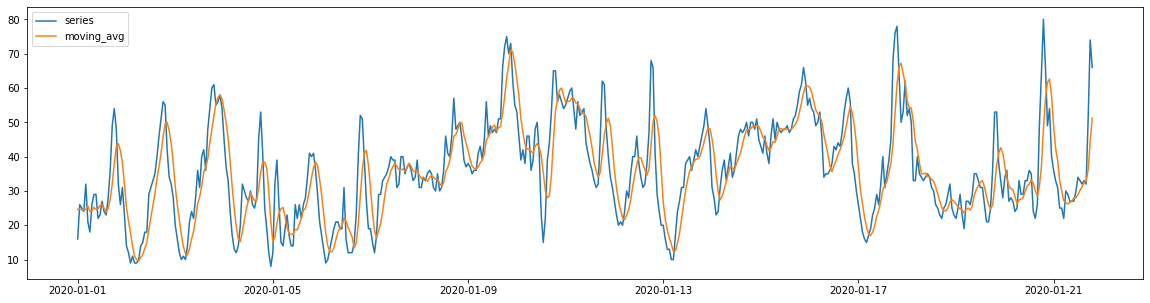

In [36]:
plt.figure(figsize = (20, 5))
plt.plot(no2['NO2 (Biossido di azoto)'][:500],"-", label="series")
plt.plot(no2['ma5'][:500],"-", label="moving_avg")

plt.legend(loc="upper left")

plt.show()